In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt

from sklearn.metrics import precision_recall_curve, average_precision_score, f1_score, auc, confusion_matrix, accuracy_score

from keras.models import load_model
#import pickle

from sklearn.decomposition import PCA

#from sklearn.model_selection import RepeatedStratifiedKFold
#from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import KFold

In [2]:
from imblearn.over_sampling import SMOTE

D:\anac\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
D:\anac\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
D:\anac\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / function

In [3]:
#x = pd.read_csv(r'D:\NSP ML\New folder\New folder\PREMATRIC-MODEL-python.csv')
G = pd.read_csv(r'D:\NSP ML\New folder\New folder\PREMATRIC-MODEL-python-FINAL.csv',parse_dates=['updated_dt','password_last_updated_on'], dayfirst=True)
G.shape

D:\anac\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (15,69,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(232593, 83)

In [4]:
G.dtypes

c_institution_id                 int64
max_application_level          float64
min_application_level          float64
avg_application_level          float64
median_as_application_level    float64
                                ...   
is_first_login                  object
is_namedies_change              object
is_valid_institute              object
Expr1                            int64
PREPOST                         object
Length: 83, dtype: object

In [5]:
#G['Expr1'] = G['Expr1'].astype('object')
G['c_institution_id'] = G['c_institution_id'].astype('object')

In [6]:
G = G.drop_duplicates()
G.shape

(232593, 83)

In [7]:
G.iloc[:,0:10].isnull().sum()

c_institution_id                   0
max_application_level          43538
min_application_level          43538
avg_application_level          43538
median_as_application_level    43538
max_annual_family_income           0
min_annual_family_income           0
avg_annual_family_income           0
median_annual_family_income        0
count_of_application_id            0
dtype: int64

In [8]:
G = G[G['c_institution_id']!=0].reset_index(drop=True)
G.shape

(232593, 83)

In [9]:
values = {'max_application_level':0, 'min_application_level':0,
       'avg_application_level':0, 'median_as_application_level':0,
       'max_annual_family_income':0, 'min_annual_family_income':0,
       'avg_annual_family_income':0, 'median_annual_family_income':0,
       'Percent_Inrank':0, 'sunday':0, 'average_of_verification_time':0, 'ZERO':0,
       'average_scholarship_amount':0, 'R1':0, 'R2':0, 'R3':0, 'R4':0, 'R5':0, 'R6':0, 'R7':0,
       'R8':0, 'M':0, 'F':0, 'T':0, 'CountOfIp Address':0, 'count(ACCEPTED_BY_PFMS)':0,
       'count(NEW)':0, 'count(REJECTED_BY_PFMS)':0, 'count (HOSTELLER_TRUE)':0,
       'count(PAYMENT_STATUS_ACCP)':0, 'count AADHAAR_REG_MODE':0, 'less_than_3':0,
       '4':0, '5':0, '6':0, '7':0, '8':0, '9':0, '10':0, '11':0, '12':0, '13':0, '14':0, '15':0, '16':0,
       '17':0, '18':0, '19':0, '20':0, '21':0, '22':0, '23':0, '24':0, '25':0, '26':0, '27':0, '28':0,
       '29':0, '30':0, 'above_30':0, 'SC':0, 'ST':0, 'OBC':0, 'rural_urban':'NNA', 'boys_girls':'NNA',
       'board_org_not_mapped':'NNA', 'registration_status':'NNA',
       'mhrd_flag':'NNA', 'is_contact_updated':'NNA',
       'is_validated_mobileno':'NNA', 'is_password_changed':'NNA',
       'is_first_login':'NNA', 'is_NNAmedies_change':'NNA', 'is_valid_institute':'NNA'}
X_T = G.drop(columns=['PREPOST','count_of_application_id', 'count_of_in_rank','schlorcolg','MaxOfAc Year','is_contact_updated'])
#print(X_T.shape)
X_T = X_T.fillna(value=values)

In [10]:
X_T.iloc[:,60:].isnull().sum()

above_30                         0
SC                               0
ST                               0
OBC                              0
rural_urban                      0
boys_girls                       0
board_org_not_mapped             0
registration_status              0
password_last_updated_on     11078
mhrd_flag                        0
is_validated_mobileno            0
is_password_changed              0
updated_dt                  232593
is_first_login                   0
is_namedies_change               0
is_valid_institute               0
Expr1                            0
dtype: int64

In [11]:
X_T.iloc[:,60:].dtypes

above_30                             int64
SC                                 float64
ST                                 float64
OBC                                float64
rural_urban                         object
boys_girls                          object
board_org_not_mapped                object
registration_status                 object
password_last_updated_on    datetime64[ns]
mhrd_flag                           object
is_validated_mobileno               object
is_password_changed                 object
updated_dt                  datetime64[ns]
is_first_login                      object
is_namedies_change                  object
is_valid_institute                  object
Expr1                                int64
dtype: object

In [12]:
result=[]
for v in X_T['updated_dt']:
    if pd.isna(v):
        result.append(0)
    else:
        v= (v- np.datetime64('1900-01-01')).days+2
        result.append(v)
X_T["updated_dt"] = result   
result=[]
for v in X_T['password_last_updated_on']:
    if pd.isna(v):
        result.append(0)
    else:
        v= (v- np.datetime64('1900-01-01')).days+2
        result.append(v)
X_T["password_last_updated_on"] = result

In [13]:
X_T.shape

(232593, 77)

In [14]:
X_T.iloc[:,60:].isnull().sum()

above_30                    0
SC                          0
ST                          0
OBC                         0
rural_urban                 0
boys_girls                  0
board_org_not_mapped        0
registration_status         0
password_last_updated_on    0
mhrd_flag                   0
is_validated_mobileno       0
is_password_changed         0
updated_dt                  0
is_first_login              0
is_namedies_change          0
is_valid_institute          0
Expr1                       0
dtype: int64

In [15]:
X_T = X_T.drop(columns=['Expr1','c_institution_id'])
X_T = pd.get_dummies(X_T)
print(X_T.shape)

(232593, 101)


In [16]:
from sklearn import preprocessing
X_T = preprocessing.scale(X_T)
print(X_T.shape)

(232593, 101)


In [17]:
X_T = pd.DataFrame(X_T)
X_T.shape

(232593, 101)

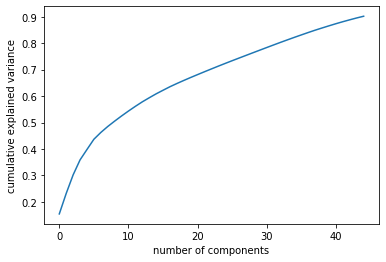

In [18]:
pca = PCA(0.9).fit(X_T)
X_pca  = pca.transform(X_T)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [19]:
X_pca = pd.DataFrame(X_pca)
X_pca['Expr1'] = G['Expr1']
X_pca['c_institution_id'] = G['c_institution_id']
X_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,Expr1,c_institution_id
0,19.825997,5.079863,-4.874522,-9.764847,-5.836459,0.469429,-4.351514,8.202045,9.809360,1.390740,...,-42.710419,92.523316,41.926415,17.324938,34.617930,-19.917549,4.579735,-19.605970,0,10010100303
1,-1.613049,1.749357,-0.610415,-0.809919,-0.352301,0.504027,-0.815753,-0.251294,-0.102658,0.351737,...,-1.921387,-0.082842,-0.763896,-0.584622,-0.828428,0.419799,0.855232,-0.088878,0,10010100505
2,-2.595342,3.567287,0.492573,-4.162511,-2.321073,4.818698,1.721271,0.810043,0.400479,0.987331,...,1.640101,0.245780,0.446932,-0.242546,0.991093,-0.269632,-0.485553,0.267929,0,10010100808
3,-2.416536,3.122555,0.780029,-3.886292,-2.309035,4.188017,0.491370,0.223970,0.504850,-1.016335,...,1.486037,0.046764,0.757554,-0.667949,0.527741,-0.684442,-0.396169,0.358722,0,10010101901
4,-2.608699,3.486405,0.431210,-4.018980,-2.164909,4.720121,1.257342,0.639733,0.313831,0.780561,...,1.736139,0.017970,0.301780,-0.357133,0.823064,-0.271397,-0.471189,0.292928,0,10010102003


In [20]:
#Under Sampling
#a = d1[d1['Fake']==1] 
d2 = X_pca.sample(frac=0.7, replace=False, random_state=3)
#d2 = d1[d1['Fake']==0].append(a, ignore_index=True)
d2['Expr1'].value_counts()

0    161464
1      1351
Name: Expr1, dtype: int64

In [21]:
d2.shape

(162815, 47)

In [22]:
d3 = X_pca[~X_pca['c_institution_id'].isin(d2['c_institution_id'])]
d3.shape

(69778, 47)

In [23]:
161464+69778+1351

232593

In [24]:
d3['Expr1'].value_counts()

0    69151
1      627
Name: Expr1, dtype: int64

Text(0, 0.5, 'Second Principal Component')

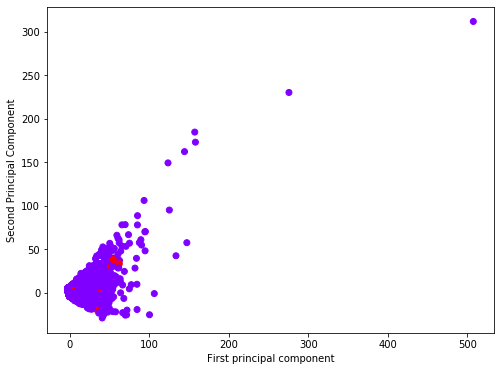

In [25]:
#x_pca = pca.transform(X)
plt.figure(figsize=(8,6))
plt.scatter(d2[0],d2[1],c=d2['Expr1'],cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Text(0, 0.5, 'Second Principal Component')

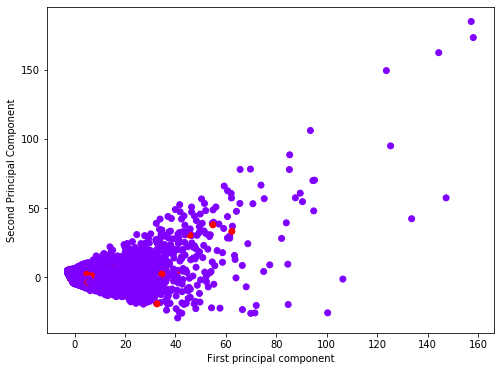

In [26]:
#Remove outliers
x_pca_df = d2[d2[0]<200]
#x_pca_df = x_pca_df[x_pca_df[1]<50000]
x_pca_df.shape
plt.figure(figsize=(8,6))
plt.scatter(x_pca_df[0],x_pca_df[1],c=x_pca_df['Expr1'],cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [28]:
x_pca_df.shape

(162813, 47)

In [29]:
d2.shape

(162815, 47)

In [30]:
X = x_pca_df.drop(columns=['Expr1','c_institution_id'])
Y = x_pca_df['Expr1'].astype('int')
# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
sm = SMOTE(random_state=27, ratio=1.0)
X_train, Y_train = sm.fit_sample(X_train, Y_train)

D:\anac\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [31]:
Y_test.value_counts()

0    40359
1      345
Name: Expr1, dtype: int64

In [32]:
X.columns

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44],
      dtype='object')

In [85]:
from sklearn.dummy import DummyClassifier
smote_dummy = DummyClassifier(strategy='most_frequent').fit(X_train, Y_train)
smote_pred = smote_dummy.predict(X_test)
# Checking accuracy
print('Accuracy ',accuracy_score(Y_test, smote_pred))
print('F1 Score ',f1_score(Y_test, smote_pred))
print('Confusion Matrix\n',pd.DataFrame(confusion_matrix(Y_test, smote_pred)))

precision, recall, thresholds = precision_recall_curve(Y_test, smote_pred)
print('AUC PR',auc(recall, precision))

Accuracy  0.9915241745283019
F1 Score  0.0
Confusion Matrix
        0  1
0  40359  0
1    345  0
AUC PR 0.5042379127358491


Accuracy  0.7700963050314465
F1 Score  0.04937017472572125
Confusion Matrix
        0     1
0  31103  9256
1    102   243
AUC PR 0.36621768124301074


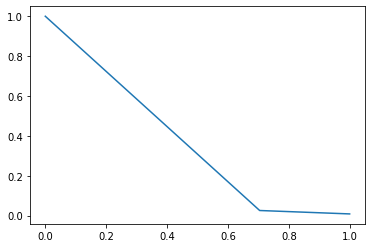

In [41]:
from sklearn.linear_model import LogisticRegression
smote_lr = LogisticRegression(solver='liblinear').fit(X_train, Y_train)
smote_pred = smote_lr.predict(X_test)
# Checking accuracy
print('Accuracy ',accuracy_score(Y_test, smote_pred))
print('F1 Score ',f1_score(Y_test, smote_pred))
print('Confusion Matrix\n',pd.DataFrame(confusion_matrix(Y_test, smote_pred)))

precision, recall, thresholds = precision_recall_curve(Y_test, smote_pred)
print('AUC PR',auc(recall, precision))

Accuracy  0.9312843946540881
F1 Score  0.07720224348399868
Confusion Matrix
        0     1
0  37790  2569
1    228   117
AUC PR 0.19414552285358955


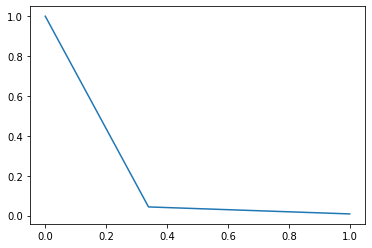

In [42]:
#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
smote_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2).fit(X_train, Y_train)
smote_pred = smote_knn.predict(X_test)
print('Accuracy ',accuracy_score(Y_test, smote_pred))
print('F1 Score ',f1_score(Y_test, smote_pred))
print('Confusion Matrix\n',pd.DataFrame(confusion_matrix(Y_test, smote_pred)))

precision, recall, thresholds = precision_recall_curve(Y_test, smote_pred)
print('AUC PR',auc(recall, precision))

plt.plot(recall, precision)
plt.show()

Accuracy  0.7799233490566038
F1 Score  0.05146124523506988
Confusion Matrix
        0     1
0  31503  8856
1    102   243
AUC PR 0.36677997688368874


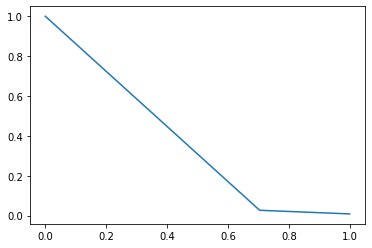

In [33]:
#Using SVC method of svm class to use Support Vector Machine Algorithm
from sklearn.svm import SVC
smote_svc = SVC(kernel = 'linear', random_state = 0).fit(X_train, Y_train)
smote_pred = smote_svc.predict(X_test)
print('Accuracy ',accuracy_score(Y_test, smote_pred))
print('F1 Score ',f1_score(Y_test, smote_pred))
print('Confusion Matrix\n',pd.DataFrame(confusion_matrix(Y_test, smote_pred)))

precision, recall, thresholds = precision_recall_curve(Y_test, smote_pred)
print('AUC PR',auc(recall, precision))

plt.plot(recall, precision)
plt.show()

Accuracy  0.8201405267295597
F1 Score  0.05669372503543357
Confusion Matrix
        0     1
0  33163  7196
1    125   220
AUC PR 0.33520884929808326


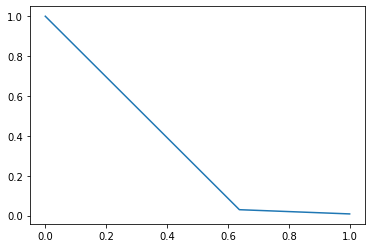

In [38]:
#Using SVC method of svm class to use Kernel SVM Algorithm
from sklearn.svm import SVC
smote_svc2 = SVC(kernel = 'rbf', random_state = 0).fit(X_train, Y_train)
smote_pred = smote_svc2.predict(X_test)
print('Accuracy ',accuracy_score(Y_test, smote_pred))
print('F1 Score ',f1_score(Y_test, smote_pred))
print('Confusion Matrix\n',pd.DataFrame(confusion_matrix(Y_test, smote_pred)))

precision, recall, thresholds = precision_recall_curve(Y_test, smote_pred)
print('AUC PR',auc(recall, precision))

plt.plot(recall, precision)
plt.show()

In [44]:
#Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
smote_ga = GaussianNB().fit(X_train, Y_train)
smote_pred = smote_ga.predict(X_test)
print('Accuracy ',accuracy_score(Y_test, smote_pred))
print('F1 Score ',f1_score(Y_test, smote_pred))
print('Confusion Matrix\n',pd.DataFrame(confusion_matrix(Y_test, smote_pred)))

precision, recall, thresholds = precision_recall_curve(Y_test, smote_pred)
print('AUC PR',auc(recall, precision))

Accuracy  0.7663374606918238
F1 Score  0.04460070316423908
Confusion Matrix
        0     1
0  30971  9388
1    123   222
AUC PR 0.33480050671587736


In [45]:
#Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
smote_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0).fit(X_train, Y_train)
smote_pred = smote_dt.predict(X_test)
print('Accuracy ',accuracy_score(Y_test, smote_pred))
print('F1 Score ',f1_score(Y_test, smote_pred))
print('Confusion Matrix\n',pd.DataFrame(confusion_matrix(Y_test, smote_pred)))

precision, recall, thresholds = precision_recall_curve(Y_test, smote_pred)
print('AUC PR',auc(recall, precision))

Accuracy  0.9556063286163522
F1 Score  0.06614987080103359
Confusion Matrix
        0     1
0  38833  1526
1    281    64
AUC PR 0.11633115856576429


In [46]:
from sklearn.ensemble import RandomForestClassifier
smote_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0).fit(X_train, Y_train)
smote_pred = smote_rf.predict(X_test)
print('Accuracy ',accuracy_score(Y_test, smote_pred))
print('F1 Score ',f1_score(Y_test, smote_pred))
print('Confusion Matrix\n',pd.DataFrame(confusion_matrix(Y_test, smote_pred)))

precision, recall, thresholds = precision_recall_curve(Y_test, smote_pred)
print('AUC PR',auc(recall, precision))

Accuracy  0.9814268867924528
F1 Score  0.11058823529411765
Confusion Matrix
        0    1
0  39901  458
1    298   47
AUC PR 0.11831116939370312


In [48]:
from sklearn.ensemble import AdaBoostClassifier
smote_ab = AdaBoostClassifier().fit(X_train, Y_train)
smote_pred = smote_ab.predict(X_test)
print('Accuracy ',accuracy_score(Y_test, smote_pred))
print('F1 Score ',f1_score(Y_test, smote_pred))
print('Confusion Matrix\n',pd.DataFrame(confusion_matrix(Y_test, smote_pred)))

precision, recall, thresholds = precision_recall_curve(Y_test, smote_pred)
print('AUC PR',auc(recall, precision))

Accuracy  0.7727004716981132
F1 Score  0.04775627830382873
Confusion Matrix
        0     1
0  31220  9139
1    113   232
AUC PR 0.3499985689022047


In [84]:
from xgboost import XGBClassifier
smote_xgbc = XGBClassifier(
    learning_rate =0.1, n_estimators=1000,
    max_depth=5, min_child_weight=1, gamma=0,subsample=0.8,colsample_bytree=0.8,
    objective= 'binary:logistic', nthread=4,scale_pos_weight=1,seed=27).fit(X_train, Y_train)
smote_pred = smote_xgbc.predict(X_test)
print('Accuracy ',accuracy_score(Y_test, smote_pred))
print('F1 Score ',f1_score(Y_test, smote_pred))
print('Confusion Matrix\n',pd.DataFrame(confusion_matrix(Y_test, smote_pred)))

precision, recall, thresholds = precision_recall_curve(Y_test, smote_pred)
print('AUC PR',auc(recall, precision))

D:\anac\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:15:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy  0.9555326257861635
F1 Score  0.1021825396825397
Confusion Matrix
        0     1
0  38791  1568
1    242   103
AUC PR 0.18306791147876067


In [64]:
d3_X = d3.drop(columns=['Expr1','c_institution_id','Predicted FK_FLAG'])
d3_Y = d3['Expr1']
print(d3_X.shape)
X_T_pred = smote_rf.predict(d3_X)
#X_T_pred = [ 1 if y>=0.5 else 0 for y in X_T_pred ]
d3['Predicted FK_FLAG'] = X_T_pred
pd.crosstab(d3['Expr1'],d3['Predicted FK_FLAG'])

(69778, 45)


D:\anac\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Predicted FK_FLAG,0,1
Expr1,,
0,68446,705
1,546,81


In [66]:
######## ARTIFICIAL NEURAL NETWORK #######

In [67]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
import keras_metrics

In [68]:
x_pca_df.shape

(162813, 47)

In [69]:
X = x_pca_df.drop(columns=['Expr1','c_institution_id'])
Y = x_pca_df['Expr1'].astype('int')
# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
sm = SMOTE(random_state=27, ratio=1.0)
X_train, Y_train = sm.fit_sample(X_train, Y_train)

D:\anac\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [71]:
X_train.shape

(242206, 45)

In [72]:
classifier = Sequential() # Initialising the ANN

classifier.add(Dense(units = 256, kernel_initializer = 'uniform', activation = 'relu', input_dim = 45))
classifier.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [73]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = [keras_metrics.precision()])

In [74]:
classifier.fit(X_train, Y_train, batch_size = 5, epochs = 10)

Epoch 1/10


D:\anac\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1402: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`layer.updates` will be removed in a future version. '


48442/48442 [==============================] - 59s 1ms/step - loss: 0.6932 - precision: 0.4924
Epoch 2/10
48442/48442 [==============================] - 57s 1ms/step - loss: 0.6932 - precision: 0.4081
Epoch 3/10
48442/48442 [==============================] - 57s 1ms/step - loss: 0.6932 - precision: 0.4940
Epoch 4/10
48442/48442 [==============================] - 56s 1ms/step - loss: 0.6932 - precision: 0.5023
Epoch 5/10
48442/48442 [==============================] - 56s 1ms/step - loss: 0.6932 - precision: 0.3969
Epoch 6/10
48442/48442 [==============================] - 57s 1ms/step - loss: 0.6932 - precision: 0.4455
Epoch 7/10
48442/48442 [==============================] - 56s 1ms/step - loss: 0.6932 - precision: 0.4942
Epoch 8/10
48442/48442 [==============================] - 57s 1ms/step - loss: 0.6932 - precision: 0.4659
Epoch 9/10
48442/48442 [==============================] - 56s 1ms/step - loss: 0.6932 - precision: 0.4554
Epoch 10/10
48442/48442 [==============================] 

In [75]:
y_pred = classifier.predict(X_test)
y_pred = [ 1 if y>=0.5 else 0 for y in y_pred ]

print('Accuracy ',accuracy_score(Y_test, y_pred))
print('F1 Score ',f1_score(Y_test, y_pred))
print('Confusion Matrix\n',pd.DataFrame(confusion_matrix(Y_test, y_pred)))

precision, recall, thresholds = precision_recall_curve(Y_test, y_pred)
print('AUC PR',auc(recall, precision))

Accuracy  0.9915241745283019
F1 Score  0.0
Confusion Matrix
        0  1
0  40359  0
1    345  0
AUC PR 0.5042379127358491


In [79]:
d3_X = d3.drop(columns=['Expr1','c_institution_id','Predicted FK_FLAG'])
d3_Y = d3['Expr1']
print(d3_X.shape)
X_T_pred = classifier.predict(d3_X)
X_T_pred = [ 1 if y>=0.5 else 0 for y in X_T_pred ]
d3['Predicted FK_FLAG'] = X_T_pred
pd.crosstab(d3['Expr1'],d3['Predicted FK_FLAG'])

(69778, 45)


D:\anac\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Predicted FK_FLAG,0
Expr1,
0,69151
1,627


In [93]:
from xgboost import XGBRegressor
my_model = XGBRegressor()
# Add silent=True to avoid printing out updates with each cycle
my_model.fit(train_X, train_y, verbose=False)

"""
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
"""

# Performance sur le train
train_y_pred = my_model.predict(train_X)
auc = roc_auc_score(train_y, train_y_pred)
print("Performance on the train : ", auc)

# Performance sur le test
test_y_pred = my_model.predict(test_X)
auc = roc_auc_score(test_y, test_y_pred)
print("Performance on the test : ", auc)

Performance on the train :  0.954696291504419
Performance on the test :  0.7732982352947514


In [71]:
""" Tuning XGBoost """
my_model = XGBRegressor(n_estimators=1000)
my_model.fit(train_X, train_y, early_stopping_rounds=2, 
             eval_set=[(test_X, test_y)], verbose=False)
"""
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
"""

# Performance sur le train
train_y_pred = my_model.predict(train_X)
auc = roc_auc_score(train_y, train_y_pred)
print("Performance sur le train : ", auc)

# Performance sur le test
test_y_pred = my_model.predict(test_X)
auc = roc_auc_score(test_y, test_y_pred)
print("Performance sur le test : ", auc)

Performance sur le train :  0.848904557839129
Performance sur le test :  0.8059503995122042


In [75]:
xgb1 = XGBClassifier(
    learning_rate =0.1, n_estimators=1000,
    max_depth=5, min_child_weight=1, gamma=0,subsample=0.8,colsample_bytree=0.8,
    objective= 'binary:logistic', nthread=4,scale_pos_weight=1,seed=27)
# modelfit(xgb1, train, train_X)
xgb1.fit(train_X, train_y)

# Performance sur le train
auc = roc_auc_score(train_y, xgb1.predict(train_X))
print("Performance sur le train : ", auc)

# Performance sur le test
auc = roc_auc_score(test_y, xgb1.predict(test_X))
print("Performance sur le test : ", auc)

D:\anac\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:40:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Performance sur le train :  0.976631901611971
Performance sur le test :  0.5127461468106355


In [ ]:
from sklearn.model_selection import GridSearchCV
param_test1 = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, 
                                                  n_estimators=1000, 
                                                  max_depth=5,
                                                  min_child_weight=1,
                                                  gamma=0, 
                                                  subsample=0.8, 
                                                  colsample_bytree=0.8,
                                                  objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
                        param_grid = param_test1, 
                        scoring='roc_auc',
                        n_jobs=4,
                        iid=False, 
                        cv=5)

gsearch1.fit(train_X,train_y)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

In [79]:
# Fix new param with optimal parameter
xgb2 = XGBClassifier(
    learning_rate =0.1, n_estimators=1000,
    gamma=0,subsample=0.8,colsample_bytree=0.8,
    objective= 'binary:logistic', nthread=4,scale_pos_weight=1,seed=27,
    max_depth = 3,
    min_child_weight = 5
)
# modelfit(xgb1, train, train_X)
xgb2.fit(train_X, train_y)

# Performance sur le train
auc = roc_auc_score(train_y, xgb2.predict(train_X))
print("Performance sur le train : ", auc)

# Performance sur le test
auc = roc_auc_score(test_y, xgb2.predict(test_X))
print("Performance sur le test : ", auc)

D:\anac\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:49:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Performance sur le train :  0.5964214711729622
Performance sur le test :  0.5085469864487959


In [ ]:
param_test3 = { 
    'gamma':[i/10.0 for i in range(0,5)] 
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, 
                                                  n_estimators=1000, 
                                                  max_depth = 3,
                                                  min_child_weight = 5,
                                                  gamma=0, subsample=0.8, colsample_bytree=0.8,
                                                  objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
                        param_grid = param_test3, 
                        scoring='roc_auc',
                        n_jobs=4,
                        iid=False, 
                        cv=5)

gsearch3.fit(train_X,train_y)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

In [92]:
xgb6 = XGBClassifier(
    learning_rate =0.007,
    n_estimators=1000,
    max_depth = 3,
    min_child_weight = 5,
    gamma=0.4,
    subsample=0.55,
    colsample_bytree=0.85,
    reg_alpha=0.005,
    objective= 'binary:logistic',
    nthread=4,
    scale_pos_weight=1,
    seed=27
)
# modelfit(xgb1, train, train_X)
xgb6.fit(train_X, train_y)

# Performance sur le train
auc = roc_auc_score(train_y, xgb6.predict(train_X))
print("Performance sur le train : ", auc)

# Performance sur le test
auc = roc_auc_score(test_y, xgb6.predict(test_X))
print("Performance sur le test : ", auc)


D:\anac\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:02:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Performance sur le train :  0.5004970178926441
Performance sur le test :  0.5


In [109]:
X = x_pca_df.drop(columns=['Expr1','c_institution_id'])
Y = x_pca_df['Expr1']
# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [112]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='most_frequent').fit(X_train, Y_train)
dummy_pred = dummy.predict(X_test)

# checking unique labels
print('Unique predicted labels: ', (np.unique(dummy_pred)))

# checking accuracy
print('Test score: ', accuracy_score(Y_test, dummy_pred))

Unique predicted labels:  [0]
Test score:  0.9915241745283019


In [115]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear').fit(X_train, Y_train)
 
# Predict on training set
lr_pred = lr.predict(X_test)

In [117]:
accuracy_score(Y_test, lr_pred)

0.9914504716981132

In [119]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score

In [121]:
f1_score(Y_test, lr_pred)

0.0

In [122]:
pd.DataFrame(confusion_matrix(Y_test, lr_pred))

,0,1
0,40356,3
1,345,0


In [124]:
rfc = RandomForestClassifier(n_estimators=10).fit(X_train, Y_train)

# predict on test set
rfc_pred = rfc.predict(X_test)

accuracy_score(Y_test, rfc_pred)

0.9912784984276729

In [126]:
f1_score(Y_test, rfc_pred)

0.043126684636118594

In [134]:
from sklearn.utils import resample
not_fraud =x_pca_df[x_pca_df.Expr1==0]
fraud = x_pca_df[x_pca_df.Expr1==1]

# upsample minority
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

# check new class counts
upsampled.Expr1.value_counts()

1    161462
0    161462
Name: Expr1, dtype: int64

In [137]:
upsampled.columns

Index([                 0,                  1,                  2,
                        3,                  4,                  5,
                        6,                  7,                  8,
                        9,                 10,                 11,
                       12,                 13,                 14,
                       15,                 16,                 17,
                       18,                 19,                 20,
                       21,                 22,                 23,
                       24,                 25,                 26,
                       27,                 28,                 29,
                       30,                 31,                 32,
                       33,                 34,                 35,
                       36,                 37,                 38,
                       39,                 40,                 41,
                       42,                 43,                

In [138]:
upsampled = upsampled.drop(columns=['c_institution_id'])
Y_train = upsampled.Expr1
X_train = upsampled.drop('Expr1', axis=1)

upsampled = LogisticRegression(solver='liblinear').fit(X_train, Y_train)

upsampled_pred = upsampled.predict(X_test)

In [139]:
f1_score(Y_test, upsampled_pred)

0.050180691791430046

In [140]:
pd.DataFrame(confusion_matrix(Y_test, upsampled_pred))

,0,1
0,31262,9097
1,102,243


In [ ]:
a = 

In [ ]:
pd.DataFrame(confusion_matrix(y_test, smote_pred))